# Question 1:

In [1]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
os.getcwd()

'C:\\Users\\Admin\\Desktop\\AIML asn part2'

In [2]:
df= pd.read_csv('C:\\Users\\Admin\\Desktop\\AIML asn part2\\BreadBasket.csv')

In [3]:
df.head(10)


,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [5]:
df.describe()

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


In [6]:
df.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [7]:
df.nunique()

Date            159
Time           8240
Transaction    9531
Item             95
dtype: int64

In [8]:
df[df['Transaction']<=0]

,Date,Time,Transaction,Item


In [9]:
df['Item'].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [10]:
df[df['Item']=='NONE']

,Date,Time,Transaction,Item
26,2016-10-30,10:27:21,11,NONE
38,2016-10-30,10:34:36,15,NONE
39,2016-10-30,10:34:36,15,NONE
66,2016-10-30,11:05:30,29,NONE
80,2016-10-30,11:37:10,37,NONE
...,...,...,...,...
21108,2017-04-08,11:54:22,9590,NONE
21122,2017-04-08,12:58:25,9599,NONE
21254,2017-04-09,12:01:07,9666,NONE
21255,2017-04-09,12:04:13,9667,NONE


In [11]:
df[df['Item']=='NONE'].count()

Date           786
Time           786
Transaction    786
Item           786
dtype: int64

In [12]:
df.drop(df[df['Item']=='NONE'].index,inplace=True)

In [13]:
df[df['Item']=='NONE'].count()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

# Feature Engineering

In [14]:

df['Date']=pd.to_datetime(df['Date'])

df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month

df['Time']=pd.to_datetime(df['Time'])
df['Hour']=df['Time'].dt.hour

df.head()

,Date,Time,Transaction,Item,Year,Month,Hour
0,2016-10-30,2021-04-03 09:58:11,1,Bread,2016,10,9
1,2016-10-30,2021-04-03 10:05:34,2,Scandinavian,2016,10,10
2,2016-10-30,2021-04-03 10:05:34,2,Scandinavian,2016,10,10
3,2016-10-30,2021-04-03 10:07:57,3,Hot chocolate,2016,10,10
4,2016-10-30,2021-04-03 10:07:57,3,Jam,2016,10,10


In [15]:
popular_item=df['Item'].value_counts().head()
popular_item

Coffee    5471
Bread     3325
Tea       1435
Cake      1025
Pastry     856
Name: Item, dtype: int64

<AxesSubplot:title={'center':'Popular Items'}, xlabel='Items', ylabel='frequencies of items'>

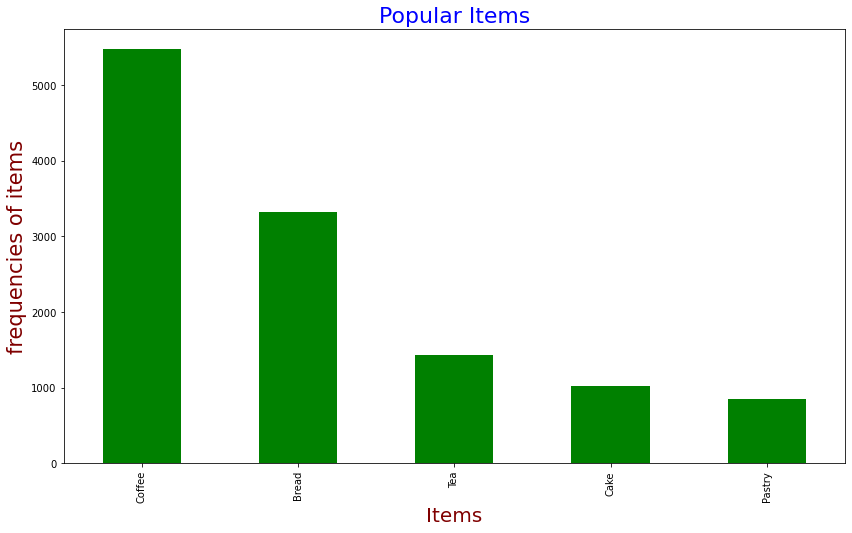

In [16]:
plt.figure(figsize=(14,8))

plt.xlabel("Items",fontsize=20, c='maroon')
plt.ylabel("frequencies of items",fontsize=21,c='maroon')

plt.title("Popular Items",fontsize=22,c='blue')
popular_item.plot(kind='bar', color='green')

In [17]:
df.groupby(['Month'])['Transaction'].nunique().sort_values(ascending=False)

Month
11    2140
3     1764
12    1672
2     1630
1     1575
4      509
10     175
Name: Transaction, dtype: int64

Text(0.5, 1.0, 'Monthly sales')

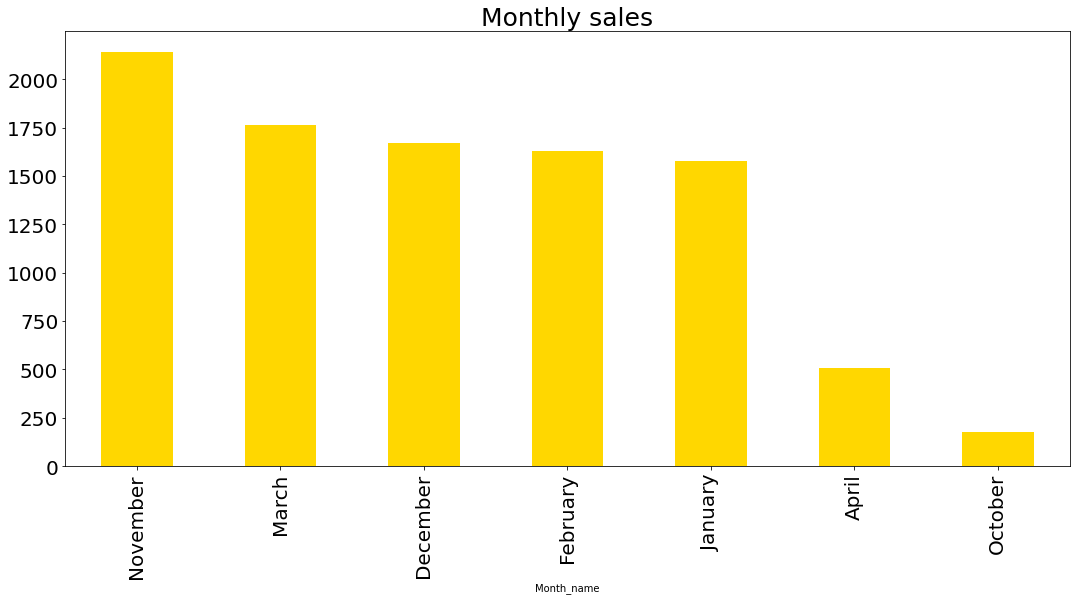

In [18]:
import calendar
df['Month_name']=df['Month'].apply(lambda x: calendar.month_name[x])

df.groupby(['Month_name'])['Transaction'].nunique().sort_values(ascending=False).plot(kind='bar',fontsize=20,figsize=(18,8), color='gold')
plt.title("Monthly sales",fontsize=25)

<AxesSubplot:xlabel='Year'>

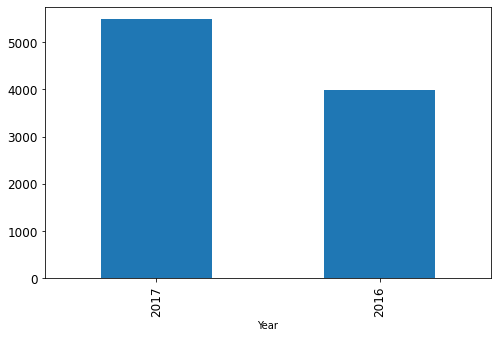

In [19]:
df.groupby(['Year'])['Transaction'].nunique().sort_values(ascending=False)[:20].plot(kind='bar',fontsize=12,figsize=(8,5))

<AxesSubplot:xlabel='Year,Item'>

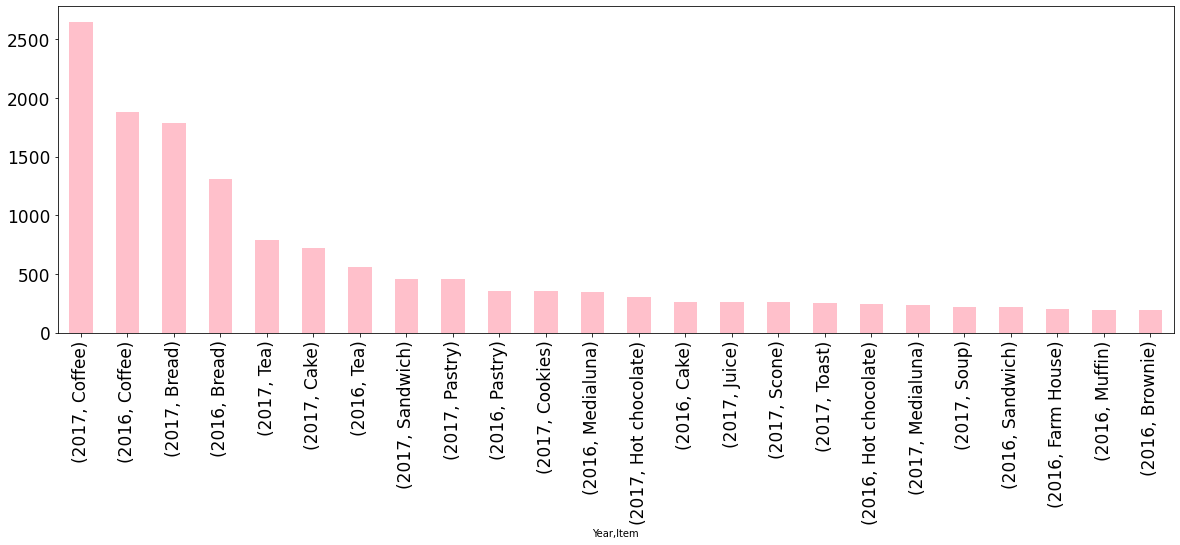

In [20]:
df.groupby(['Year','Item'])['Transaction'].nunique().sort_values(ascending=False)[:24].plot(kind='bar',figsize=(20,6),color='pink',fontsize=17)

In [21]:
df.head(10)

,Date,Time,Transaction,Item,Year,Month,Hour,Month_name
0,2016-10-30,2021-04-03 09:58:11,1,Bread,2016,10,9,October
1,2016-10-30,2021-04-03 10:05:34,2,Scandinavian,2016,10,10,October
2,2016-10-30,2021-04-03 10:05:34,2,Scandinavian,2016,10,10,October
3,2016-10-30,2021-04-03 10:07:57,3,Hot chocolate,2016,10,10,October
4,2016-10-30,2021-04-03 10:07:57,3,Jam,2016,10,10,October
5,2016-10-30,2021-04-03 10:07:57,3,Cookies,2016,10,10,October
6,2016-10-30,2021-04-03 10:08:41,4,Muffin,2016,10,10,October
7,2016-10-30,2021-04-03 10:13:03,5,Coffee,2016,10,10,October
8,2016-10-30,2021-04-03 10:13:03,5,Pastry,2016,10,10,October
9,2016-10-30,2021-04-03 10:13:03,5,Bread,2016,10,10,October
